In [1]:
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# tf.disable_v2_behavior()

In [2]:
from sklearn.metrics import r2_score

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [67]:
# Reading the datasets using pandas
df = pd.read_csv("Datasets_acestic_acid.csv")
# Set x and y and reshape iti
x_input = df["Time (min)"].values.reshape(-1,)
y_input = df["Wall – Thickness Loss (µm)"].values.reshape(-1,1)

# Prepare empty list to save an mse and R^2 from models
mse = []
R2_score = []
# Empty list for calculated new value of linear regression
Y_test =[]

# set a loop for 3 different models

# plot results
# set a plot size



In [49]:
df

,Time (min),Wall – Thickness Loss (µm)
0,0.001017,0.000000
1,2.131605,-0.010043
2,5.670049,-0.002009
3,8.503041,0.000000
4,9.214592,-0.006026
...,...,...
913,603.524794,-1.162984
914,598.564263,-1.160976
915,604.262775,-1.221234
916,260.262170,-0.476040


In [50]:
for x in range(3):
    n = x+1
    # Set a variables for weights
    W = tf.Variable(tf.random.normal([n,1]), name='weights')
    
    # Set variables for bias
    b = tf.Variable(tf.random.normal([1]), name='bias')

    # Set a placeholder for input data
    X=tf.placeholder(tf.float32,shape=[None,n])
    Y=tf.placeholder(tf.float32,shape=[None, 1])


    #preparing the data
    def modify_input(x,x_size,n_value):
        x_new=np.zeros([x_size,n_value])
        for i in range(n):
            x_new[:,i]=np.power(x,(i+1))
            x_new[:,i]=x_new[:,i]/np.max(x_new[:,i])
        return x_new

    x_modified=modify_input(x_input,x_input.size,n)
    
    # Create model
    Y_pred=tf.add(tf.matmul(X,W),b)

    #algortihm
    # Calculate the loss mse
    loss = tf.losses.mean_squared_error(Y, Y_pred)
    
    #training algorithm
    optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    
    #initializing the variables
    init = tf.global_variables_initializer()

    #starting the session
    sess = tf.Session()
    sess.run(init)
    
    # Reset the graph
    tf.reset_default_graph()
    
    # stes number of epochs
    epoch= 100000
    
    # Run the model
    for step in range(epoch):
         _, c=sess.run([optimizer, loss], feed_dict={X: x_modified, Y: y_input})
         if step%10000==0 :
            print(c)
    
    # print model paramters
    print("Model paramters:" )
    print(sess.run(W))
    print("Bias:%f" %sess.run(b))
    
    # Calculate the prediction value (linear regression points)
    y_test=sess.run(Y_pred, feed_dict={X:x_modified})
    
    # Calculate the R^2
    r2 = r2_score(y_input, y_test)
    print(r2)
    
    # Append data to empty list
    Y_test.append(y_test)
    mse.append(c)
    
    R2_score.append(r2)
# Print the MSE and R^2
print(mse)
print(R2_score)

# Change list to array
y_test = np.array(Y_test)

0.7760545
0.0025362612
0.0025362612
0.0025362612
0.0025362612
0.0025362612
0.0025362612
0.0025362612
0.0025362612
0.0025362612
Model paramters:
[[-1.1608634]]
Bias:0.031195
0.9787265299306315
0.35495126
0.0037109854
0.0024614427
0.0020493267
0.0019133897
0.0018685486
0.0018537503
0.0018488644
0.0018472511
0.0018467174
Model paramters:
[[-0.81172276]
 [-0.35316554]]
Bias:-0.024475
0.9845117232668309
0.5207832
0.0023637118
0.0018653652
0.0018321149
0.0018274874
0.0018247216
0.0018221695
0.0018197385
0.0018173907
0.0018151371
Model paramters:
[[-0.76532847]
 [-0.49851668]
 [ 0.10944892]]
Bias:-0.026490
0.9847932793471039
[0.0025362612, 0.0018465404, 0.0018129727]
[0.9787265299306315, 0.9845117232668309, 0.9847932793471039]


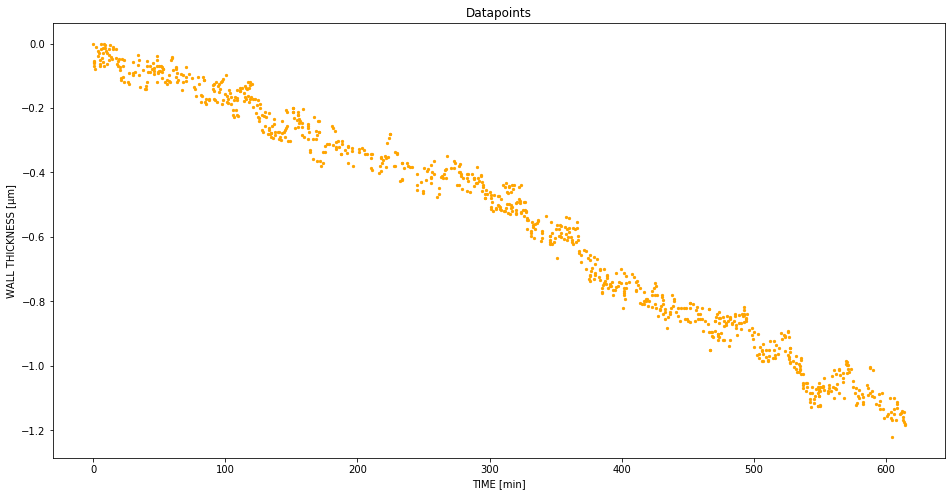

In [51]:
# plot all the datapoints
plt.figure(figsize=(16,8))

# plot datasets points
plt.scatter(x_input, y_input, label='training points', color='orange',s=5)

# Adding the title to the plot
plt.title('Datapoints')

# setting x and y labels
plt.xlabel('TIME [min]')
plt.ylabel('WALL THICKNESS [µm]')

#saving the figure locally
plt.savefig('acetic_datapoints.png',bbox_inches='tight',dpi=600)

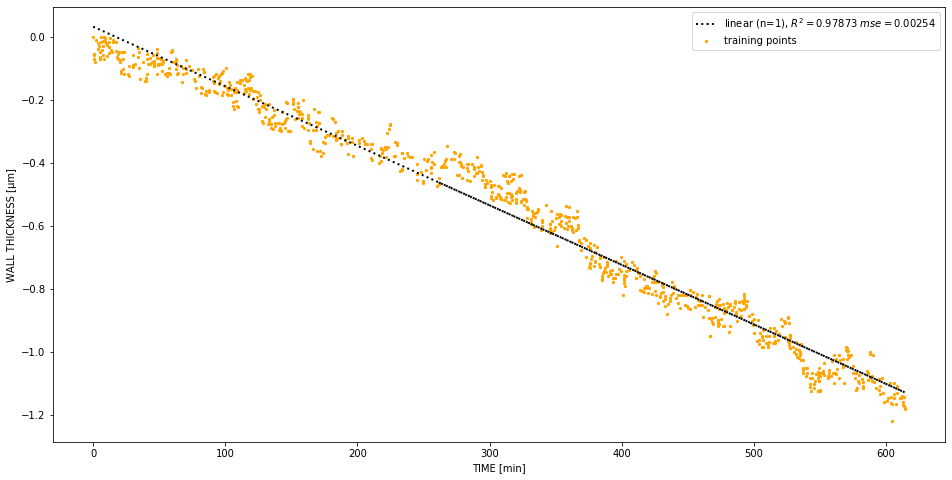

In [52]:
# plot simple linear regression
plt.figure(figsize=(16,8))

# starting by plotting all the datapoints
plt.scatter(x_input, y_input, label='training points', color='orange',s=5)

# plotting all the linear regression line on the same dataset
plt.plot(x_input, y_test[0],
         label='linear (n=1), $R^2=%.5f$ $mse=%.5f$' % (R2_score[0], mse[0]),
         color='black',
         lw=2,
         linestyle=':')


# plt.title('Tensorflow model-Linear Regression')

# setting x and y labels
plt.xlabel('TIME [min]')
plt.ylabel('WALL THICKNESS [µm]')

# Add legend
plt.legend(loc='upper right')
plt.savefig('Linear_acetic.png',bbox_inches='tight',dpi=600)

In [ ]:
# plot quadratic linear egression
plt.figure(figsize=(16,8))
plt.scatter(x_input, y_input, label='training points', color='orange',s=5)

#plotting the regression lines
plt.plot(x_input, y_test[1],
         label='quadratic (n=2), $R^2=%.5f$  $mse=%.5f$' % (R2_score[1], mse[1]),
         color='red',
         lw=2,
         linestyle='-')

# add title to plot
# plt.title('Tensorflow model-Cubic-Acetic Acid')

# set x and y labels
plt.xlabel('TIME [min]')
plt.ylabel('WALL THICKNESS [µm]')

# Add legend
plt.legend(loc='upper right')

# save plot
# plt.savefig('tensorflow.png',bbox_inches='tight',dpi=600)
plt.show()

In [ ]:
# plot cubic linear egression
plt.figure(figsize=(16,8))
plt.scatter(x_input, y_input, label='training points', color='orange',s=5)

#plotting the regression lines
plt.plot(x_input, y_test[2],
         label='cubic (n=3), $R^2=%.5f$  $mse=%.5f$' % (R2_score[2], mse[2]),
         color='green',
         lw=2,
         linestyle='--')

# add title to plot
# plt.title('Tensorflow model-Cubic-Acetic Acid')

# set x and y labels
plt.xlabel('TIME [min]')
plt.ylabel('WALL THICKNESS [µm]')

# Add legend
plt.legend(loc='upper right')

# save plot
# plt.savefig('tensorflow.png',bbox_inches='tight',dpi=600)
plt.show()

In [ ]:
# plot cubic linear egression
plt.figure(figsize=(16,8))
plt.scatter(x_input, y_input, label='training points', color='orange',s=5)

#plotting all the regression lines
plt.plot(x_input, y_test[0],
         label='linear (n=1), $R^2=%.5f$ $mse=%.5f$' % (R2_score[0], mse[0]),
         color='black',
         lw=2,
         linestyle=':')
plt.plot(x_input, y_test[1],
         label='quadratic (n=2), $R^2=%.5f$  $mse=%.5f$' % (R2_score[1], mse[1]),
         color='red',
         lw=2,
         linestyle='-')
plt.plot(x_input, y_test[2],
         label='cubic (n=3), $R^2=%.5f$  $mse=%.5f$' % (R2_score[2], mse[2]),
         color='green',
         lw=2,
         linestyle='--')

# add title to plot
# plt.title('Tensorflow model-Cubic-Acetic Acid')

# set x and y labels
plt.xlabel('TIME [min]')
plt.ylabel('WALL THICKNESS [µm]')

# Add legend
plt.legend(loc='upper right')

# save plot
# plt.savefig('tensorflow.png',bbox_inches='tight',dpi=600)
plt.show()

In [24]:
#import all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [53]:
# Read the datasets
df = pd.read_csv("Datasets_citric_acid.csv")

# Set an x and y
X = df[["Time (min)"]].values
y = df["Wall – Thickness Loss (µm)"].values

# Call Linear regression
regr = LinearRegression()

In [54]:
# Call an PolynomialFeatures
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [55]:
# Prepare x data for predict
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

In [56]:
# Fit the date into regression model
regr = regr.fit(X, y)

# Predict on new data
y_lin_fit = regr.predict(X_fit)

# Calculate the MSE
linear_MSE = mean_squared_error(y, regr.predict(X))

# Calculate R^2
linear_r2 = r2_score(y, regr.predict(X))

# Print coefficient and intercept
print('Slope linear' ,regr.coef_)
print('Intercept linear:' ,regr.intercept_)
print('\n')

Slope linear [-0.00189021]
Intercept linear: 0.03121221640953209




In [57]:
# Fit the date into regression model
regr = regr.fit(X_quad, y)

# Predict on new data
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))

# Calculate the MSE
quadratic_MSE = mean_squared_error(y, regr.predict(X_quad))

# Calculate R^2
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# Print coefficient and intercept
print('Slope quadratic:',regr.coef_)
print('Intercept quadratic:',regr.intercept_)
print('\n')

Slope quadratic: [ 0.00000000e+00 -1.32822681e-03 -9.25867882e-07]
Intercept quadratic: -0.02378426999976846




In [58]:
# Fit the date into regression mode
regr = regr.fit(X_cubic, y)

# Predict on new data
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))

# Calculate the MSE
cubic_MSE= mean_squared_error(y, regr.predict(X_cubic))

# Calculate R^2
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# Print coefficient and intercept
print('Slope cubic:', regr.coef_)
print('Intercept cubic:',regr.intercept_)
print('\n')

Slope cubic: [ 0.00000000e+00 -8.54837379e-04 -2.86525255e-06  2.10923304e-09]
Intercept cubic: -0.046799889687784146




In [59]:
# Print MSE for all models
print('Training MSE linear: %.6f, quadratic: %.6f, cubic: %.6f' % (
        linear_MSE,
        quadratic_MSE,
        cubic_MSE))
# Print R^2 for all models
print('Training R^2 linear: %.6f, quadratic: %.6f, cubic: %.6f' % (
        linear_r2,
        quadratic_r2,
        cubic_r2))

Training MSE linear: 0.002536, quadratic: 0.001846, cubic: 0.001759
Training R^2 linear: 0.978727, quadratic: 0.984512, cubic: 0.985244


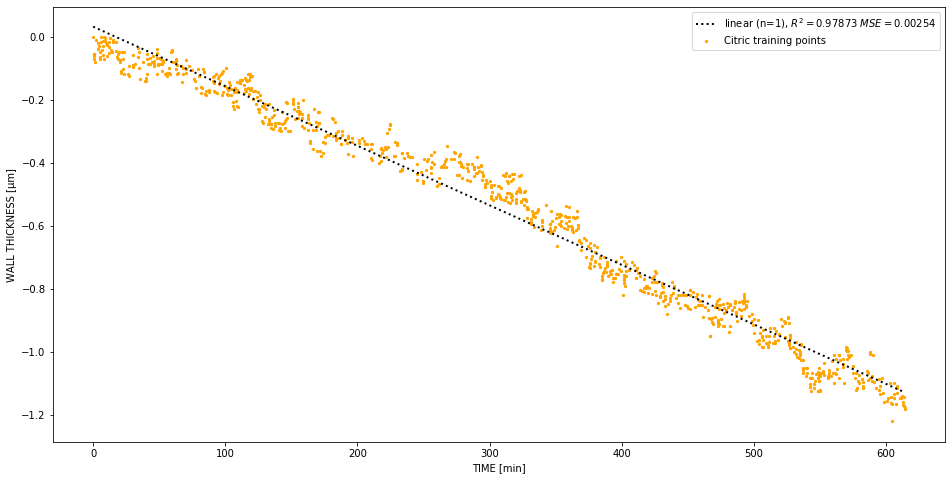

In [60]:
# set a plot size
plt.figure(figsize=(16,8))
# plot datasets points
plt.scatter(X, y, label='Citric training points', color='orange',s=5)
# plot simple linear regression
plt.plot(X_fit, y_lin_fit,
         label='linear (n=1), $R^2=%.5f$ $MSE=%.5f$' % (linear_r2, linear_MSE),
         color='black',
         lw=2,
         linestyle=':')
# plt.title('Acetic Linear')
plt.xlabel('TIME [min]')
plt.ylabel('WALL THICKNESS [µm]')
plt.legend(loc='upper right')
# plt.savefig('Citric_linear.png',bbox_inches='tight',dpi=600)
# plt.show()
plt.show()

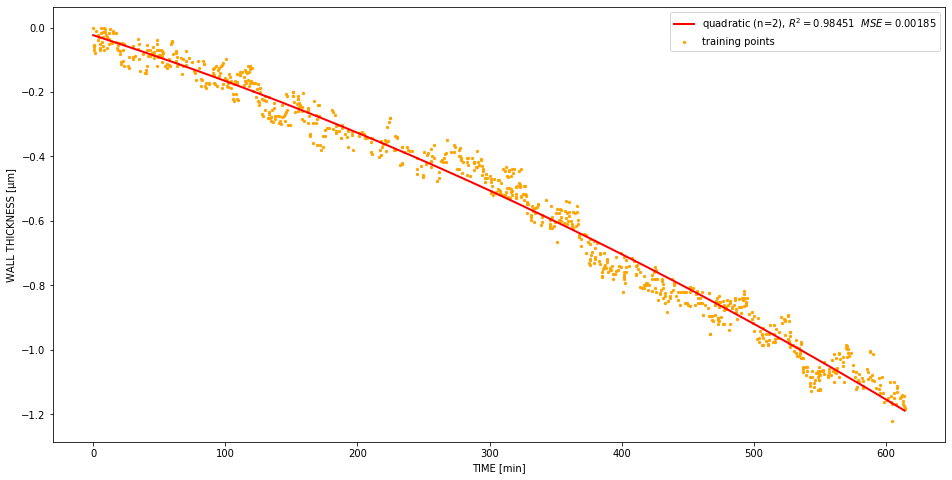

In [61]:
# plot quadratic linear regression
plt.figure(figsize=(16,8))
plt.scatter(X, y, label='training points', color='orange',s=5)
plt.plot(X_fit, y_quad_fit,
         label='quadratic (n=2), $R^2=%.5f$  $MSE=%.5f$' % (quadratic_r2, quadratic_MSE),
         color='red',
         lw=2,
         linestyle='-')
# plt.title('Acetic Quadratic')
plt.xlabel('TIME [min]')
plt.ylabel('WALL THICKNESS [µm]')
plt.legend(loc='upper right')
# plt.savefig('Cubic Quadratic.png',bbox_inches='tight',dpi=600)
plt.show()


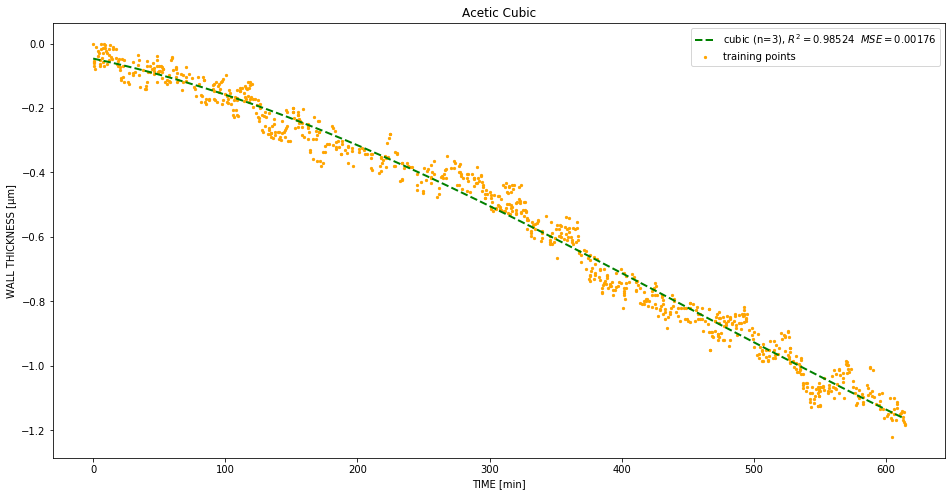

In [62]:
# plot cubic linear egression
plt.figure(figsize=(16,8))
plt.scatter(X, y, label='training points', color='orange',s=5)
plt.plot(X_fit, y_cubic_fit,
         label='cubic (n=3), $R^2=%.5f$  $MSE=%.5f$' % (cubic_r2, cubic_MSE),
         color='green',
         lw=2,
         linestyle='--')
plt.title('Acetic Cubic')
plt.xlabel('TIME [min]')
plt.ylabel('WALL THICKNESS [µm]')
plt.legend(loc='upper right')
plt.show()


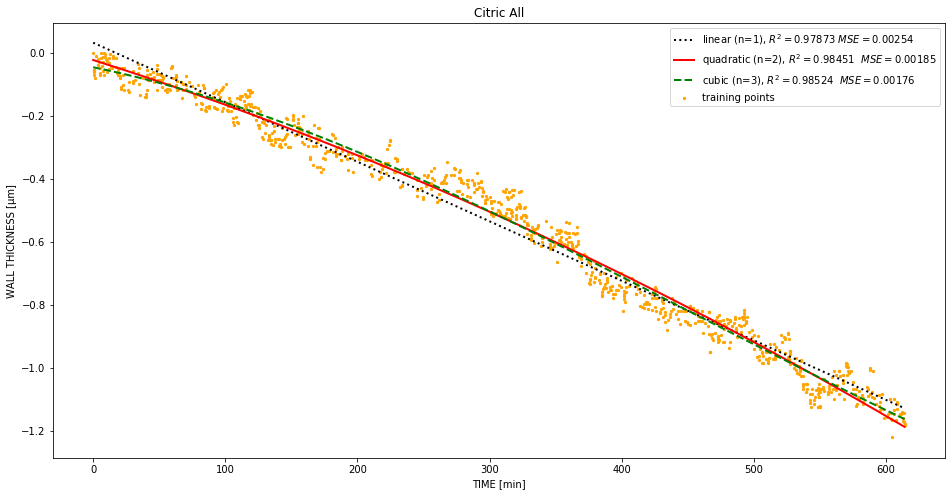

In [63]:
plt.figure(figsize=(16,8))
plt.scatter(X, y, label='training points', color='orange',s=5)
plt.plot(X_fit, y_lin_fit,
         label='linear (n=1), $R^2=%.5f$ $MSE=%.5f$' % (linear_r2, linear_MSE),
         color='black',
         lw=2,
         linestyle=':')
plt.plot(X_fit, y_quad_fit,
         label='quadratic (n=2), $R^2=%.5f$  $MSE=%.5f$' % (quadratic_r2, quadratic_MSE),
         color='red',
         lw=2,
         linestyle='-')
plt.plot(X_fit, y_cubic_fit,
         label='cubic (n=3), $R^2=%.5f$  $MSE=%.5f$' % (cubic_r2, cubic_MSE),
         color='green',
         lw=2,
         linestyle='--')
plt.title('Citric All')
plt.xlabel('TIME [min]')
plt.ylabel('WALL THICKNESS [µm]')
plt.legend(loc='upper right')
plt.show()